In [2]:
from google.colab import files
uploaded = files.upload()

KeyboardInterrupt: 

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [5]:
deliv = pd.read_csv("deliveries.csv")
mat  = pd.read_csv("matches.csv")

## **Cleaning and Transformtion**

In [6]:
mat.drop('umpire3',axis=1,inplace=True)
mat=mat.replace('Rising Pune Supergiants','Rising Pune Supergiant')
deliv.fillna(0,inplace=True)
mat['winner'].fillna('Draw',inplace=True)
mat['city'].fillna('Mumbai',inplace=True)
mat['player_of_match'].fillna('No one',inplace=True)
mat['umpire2'].fillna('SJA Taufel',inplace=True)
mat['umpire1'].fillna('HDPK Dharmasena',inplace=True)
#mat.columns = mat.columns.str.strip()
deliv.rename(columns={'match_id': 'id'}, inplace=True)

/tmp/ipython-input-6-506353455.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mat['winner'].fillna('Draw',inplace=True)
/tmp/ipython-input-6-506353455.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

## Plot the following graph

**Maximum Toss Winners**

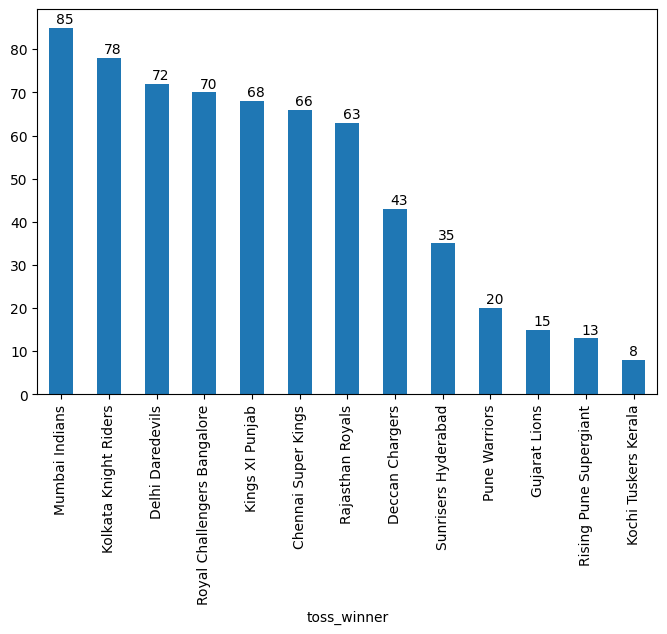

In [7]:
plt.subplots(figsize=(8,5))
ax=mat['toss_winner'].value_counts().plot.bar(width=0.5)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

**Toss Decision wrt Season**

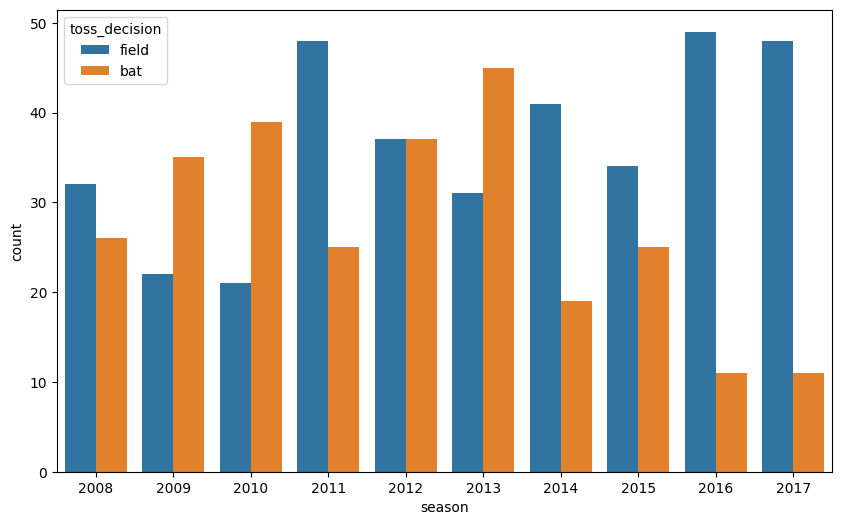

In [8]:
plt.subplots(figsize=(10,6))
sns.countplot(x='season',hue='toss_decision',data=mat)
plt.show()

**Toss Decision wrt Team**

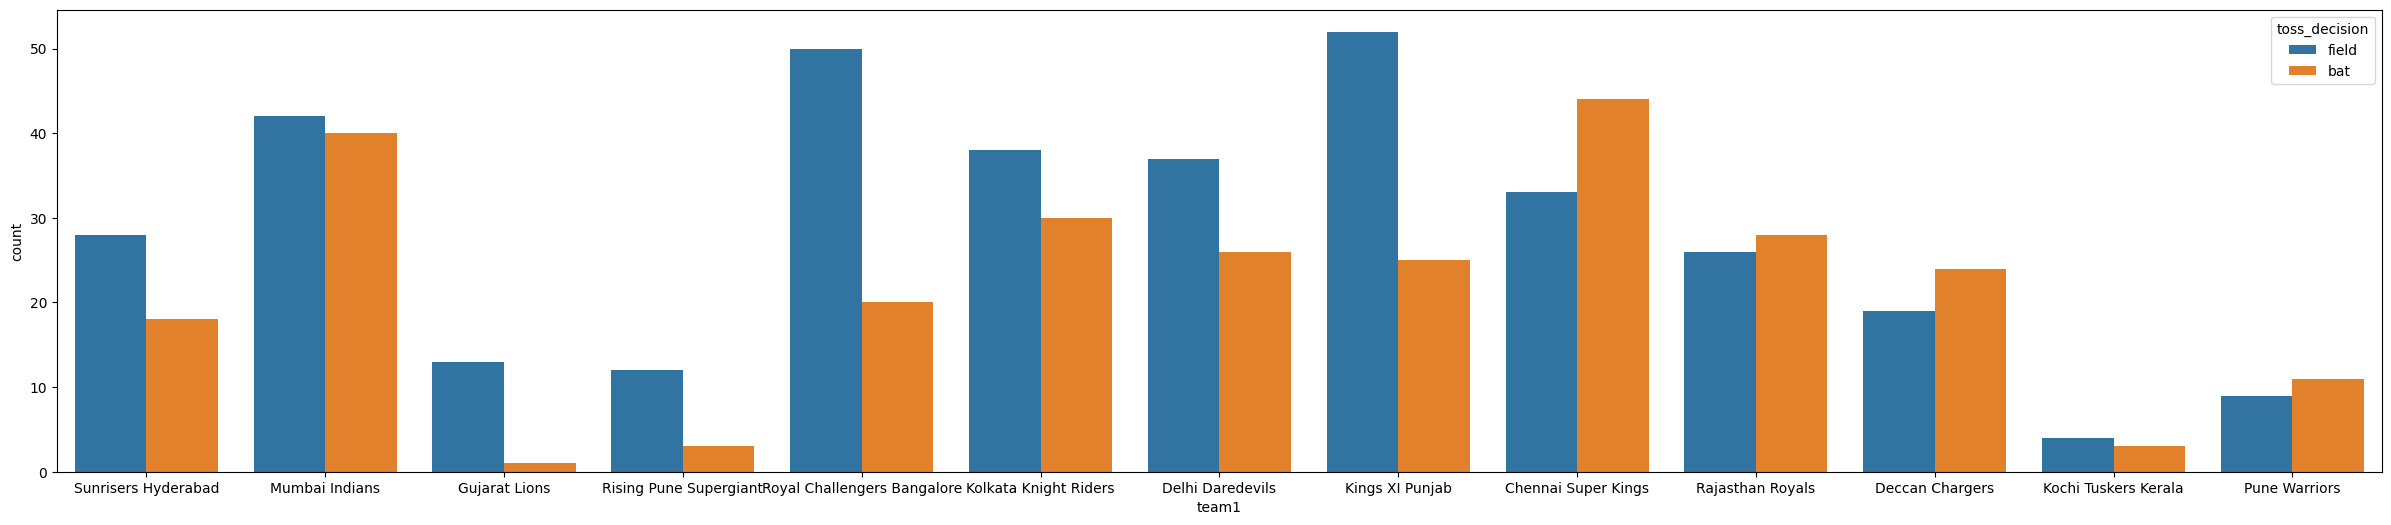

In [9]:
plt.subplots(figsize=(30,6))
sns.countplot(x='team1',hue='toss_decision',data=mat)
plt.show()

**Maximum Wins**

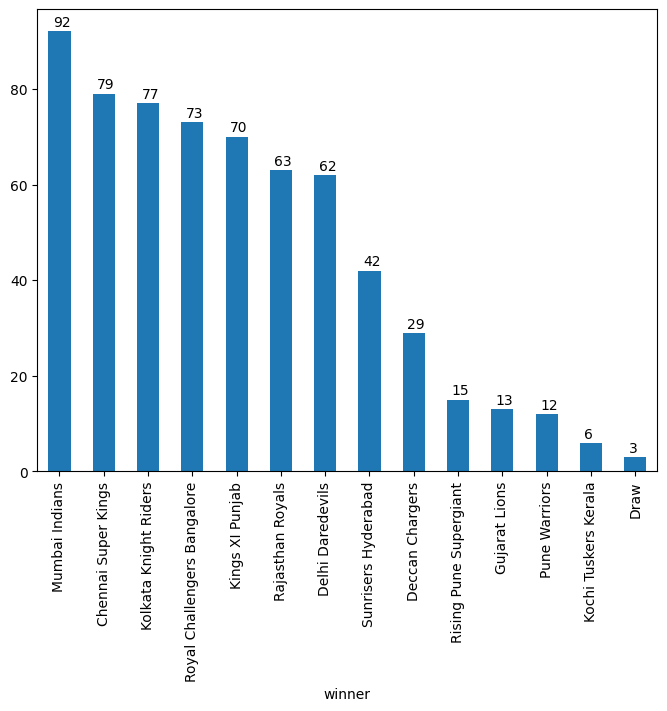

In [10]:
'''
mat['winner'].value_counts().plot.bar()
plt.title('Maximum WInners')
plt.xlabel('Teams')
plt.ylabel('Count')
'''
plt.subplots(figsize=(8,6))
wnrs = mat['winner'].value_counts().plot.bar(width=0.5)
for x in wnrs.patches:
  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))
plt.show()

**Total Matches vs Wins for Teams**

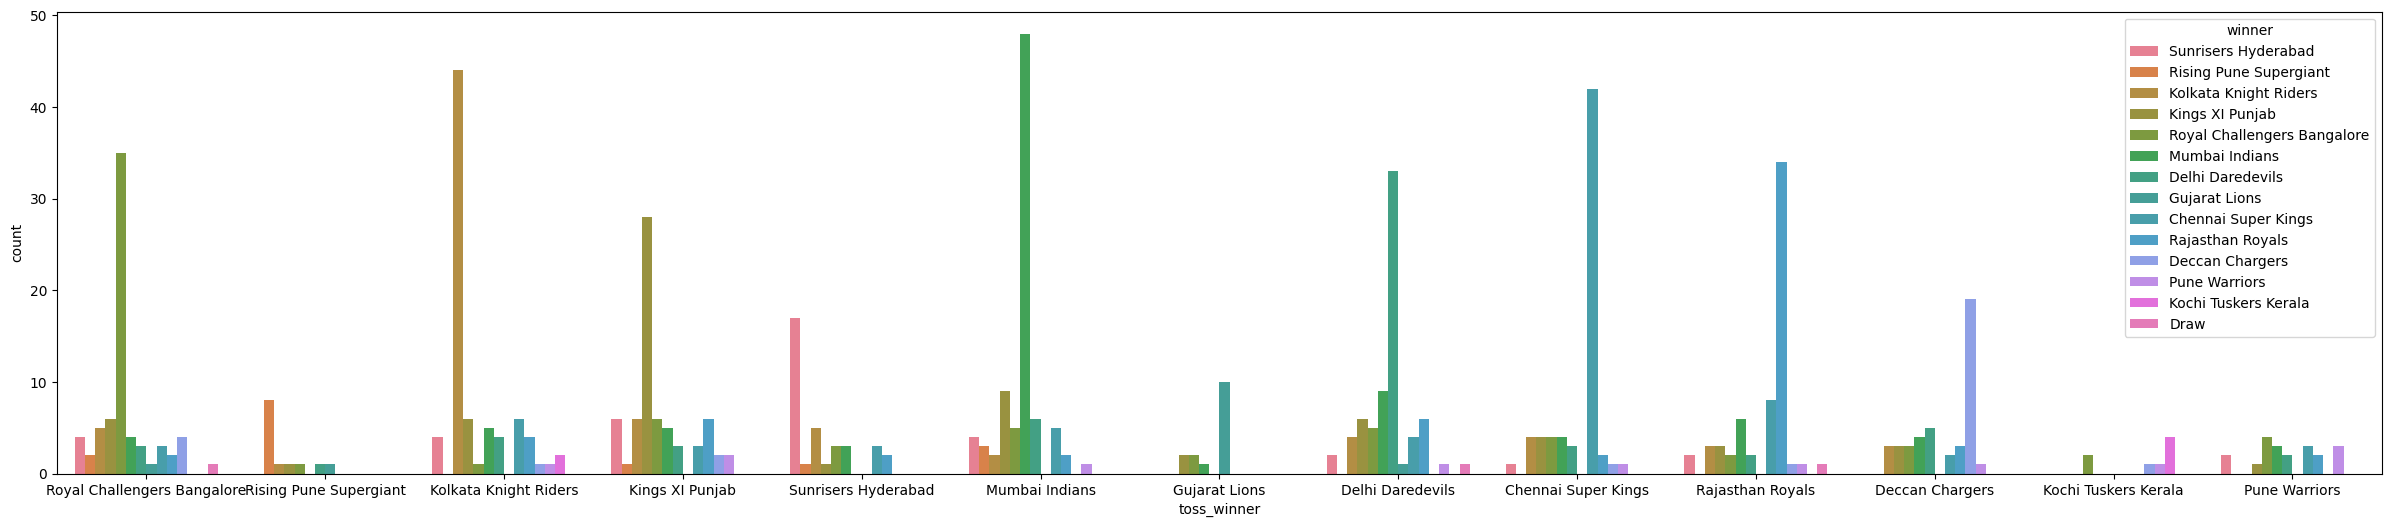

In [11]:
plt.subplots(figsize=(30,6))
sns.countplot(x='toss_winner',hue='winner',data=mat)
plt.show()

**Is Toss Winner Also the Match Winner?**

In [12]:
'''
c2 = mat[(mat.winner == mat.toss_winner)]
c2['winner'].value_counts().plot.bar()
plt.title('Percentage of Winning a match if toss is won')
plt.xlabel('Teams')
plt.ylabel('Percentage')
'''
#plt.subplots(figsize=(8,6))
c2 = mat[(mat.winner == mat.toss_winner)]
sall = len(mat.index)
sm=len(c2.index)
print("percentage of winning match if toss is won:-",(sm/sall)*100)
'''
wnrs = c2['winner'].value_counts().plot.bar(width=0.5)
for x in wnrs.patches:
  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))
plt.show()
'''

percentage of winning match if toss is won:- 51.100628930817614


"\nwnrs = c2['winner'].value_counts().plot.bar(width=0.5)\nfor x in wnrs.patches:\n  wnrs.annotate(format(x.get_height()),(x.get_x()+0.1,x.get_height()+1))\nplt.show()\n"

In [13]:
d2mat = mat[['id','season']]
d2deliv = deliv[['id','batsman_runs']]
d2 = pd.merge(d2mat,d2deliv,on='id',how='inner')

**Sixes and Fours Across the Season**

In [14]:
d24 = d2[d2.batsman_runs == 4]
d26 = d2[d2.batsman_runs == 6]

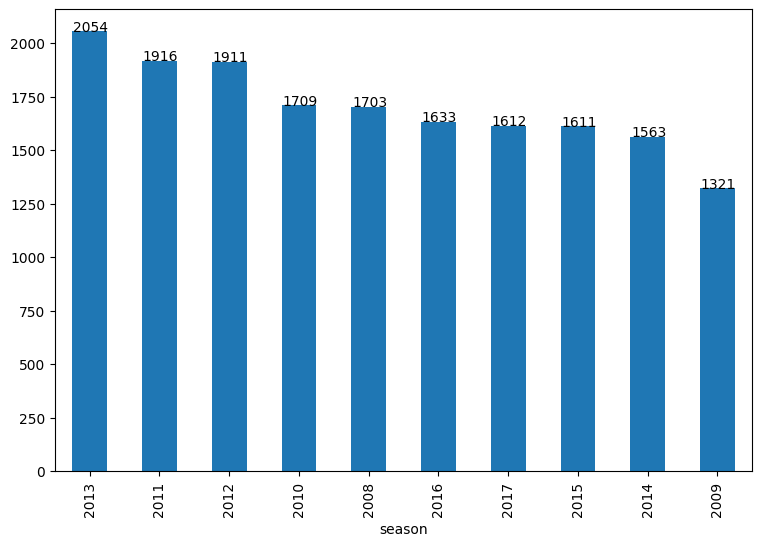

"\nplt.title('Fours in a season')\nplt.xlabel('seasons')\nplt.ylabel('Count')\n"

In [15]:
plt.subplots(figsize=(9,6))
d4 = d24['season'].value_counts().plot.bar(width=0.5)
for x in d4.patches:
  d4.annotate(format(x.get_height()),(x.get_x()+0.01,x.get_height()+1.05))
plt.show()
'''
plt.title('Fours in a season')
plt.xlabel('seasons')
plt.ylabel('Count')
'''

Text(0, 0.5, 'Count')

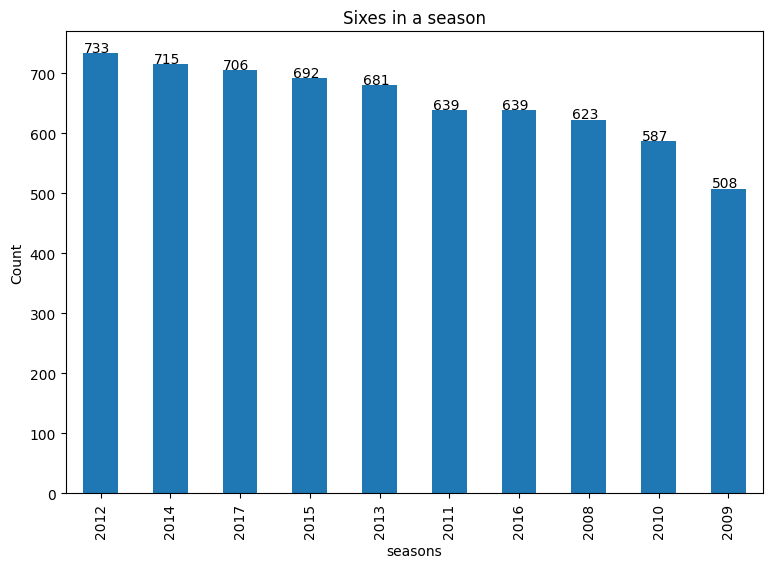

In [16]:
plt.subplots(figsize=(9,6))
d6 = d26['season'].value_counts().plot.bar(width=0.5)
for x in d6.patches:
  d6.annotate(format(x.get_height()),(x.get_x()+0.01,x.get_height()+1.5))
plt.title('Sixes in a season')
plt.xlabel('seasons')
plt.ylabel('Count')

**Runs Per Over By Teams Across Seasons**

/tmp/ipython-input-17-3843093366.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  rpo = deliv.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)


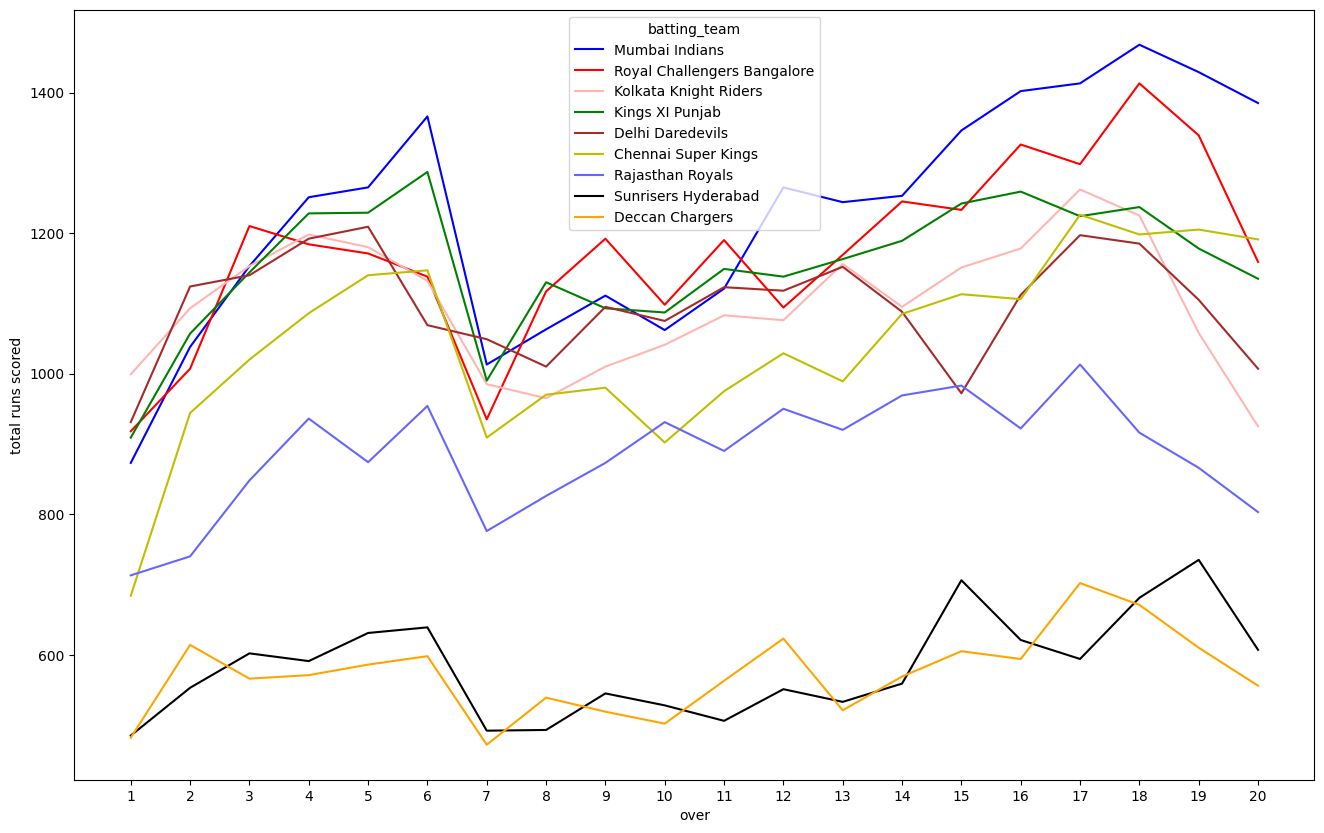

In [17]:
rpo = deliv.pivot_table(index=['over'],columns='batting_team',values='total_runs',aggfunc=sum)
mpbt=pd.concat([mat['team1'],mat['team2']])
mpbt=mpbt.value_counts().reset_index()
mpbt.columns=['Team','Total Matches']
mpbt['wins']=mat['winner'].value_counts().reset_index()['winner']
mpbt.set_index('Team',inplace=True)
rpo[(mpbt[mpbt['Total Matches']>50].index)].plot(color=["b", "r", "#Ffb6b2", "g",'brown','y','#6666ff','black','#FFA500'])
x=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.xticks(x)
plt.ylabel('total runs scored')
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()


**Maximum Man Of Matches**

Text(0, 0.5, 'count')

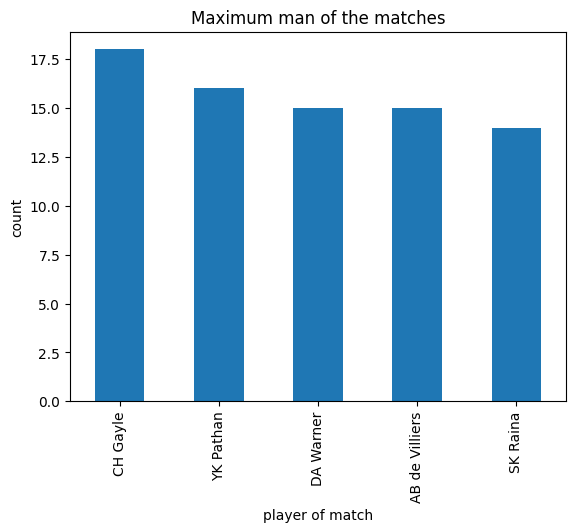

In [18]:
f2 = mat['player_of_match'].value_counts().head().plot.bar()
#ax = matches['player_of_match'].value_counts().head(10).plot.bar(width=.8, color=sns.color_palette('inferno',10))
plt.title("Maximum man of the matches")
plt.xlabel('player of match')
plt.ylabel('count')

### Create a table with the following data also visualize if possible:

**Team Comparator**

In [19]:
a = 'Mumbai Indians'
b = 'Chennai Super Kings'
mt1=mat[(((mat['team1']==a)&(mat['team2']==b))|((mat['team1']==b)&(mat['team2']==a)))]
mt1 = mt1[['team1','team2','winner']]
tc = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
tc.loc[0,'count'] = tc.loc[0,'count'] + tc.loc[2,'count']
tc.loc[1,'count'] = tc.loc[1,'count'] + tc.loc[3,'count']
tc.loc[0,'team1_wins'] = tc.loc[0,'count']
tc.loc[0,'team2_wins'] = tc.loc[1,'count']
tc.drop(['winner','count'],axis=1,inplace=True)
tc = tc[:1]
tc

,team1,team2,team1_wins,team2_wins
0,Chennai Super Kings,Mumbai Indians,10.0,12.0


**Matches Won By A Team Against Other Teams**

In [20]:
'''
def matwonagt(a):
  team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']
  team_l.remove(a)
  teams = team_l.copy()
  mt1=mat[((mat['team1']==a)|(mat['team2']==a))]
  mt1 = mt1[['team1','team2','winner']]
  mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
  mtag
  for i in range(0,len(mtag)):
    if mtag.loc[i,'team1'] != a:
      t = mtag.loc[i,'team1']
      mtag.loc[i,'team1'] = mtag.loc[i,'team2']
      mtag.loc[i,'team2'] = t
  mtagg = mtag.groupby(['team1','team2'])['count'].sum().reset_index()
  for i in range(0, len(mtagg),2):
    mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']
  #mtagg = mtagg.iloc[::2]
  mtagg.rename(columns={'count':'wins'},inplace=True)
  print(mtagg)
matwonagt('Chennai Super Kings')
'''

"\ndef matwonagt(a):\n  team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']\n  team_l.remove(a)\n  teams = team_l.copy()\n  mt1=mat[((mat['team1']==a)|(mat['team2']==a))]\n  mt1 = mt1[['team1','team2','winner']]\n  mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})\n  mtag\n  for i in range(0,len(mtag)):\n    if mtag.loc[i,'team1'] != a:\n      t = mtag.loc[i,'team1']\n      mtag.loc[i,'team1'] = mtag.loc[i,'team2']\n      mtag.loc[i,'team2'] = t\n  mtagg = mtag.groupby(['team1','team2'])['count'].sum().reset_index()\n  for i in range(0, len(mtagg),2):\n    mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']\n  #mtagg = mtagg.iloc[::2]\n  mtagg.rename(columns={'count':'wins'},inplace=True)\n  print(mtagg)\nmatwonagt('Chen

In [21]:
a = 'Chennai Super Kings'
team_l = ['Sunrisers Hyderabad','Mumbai Indians','Gujarat Lions','Rising Pune Supergiants','Royal Challengers Bangalore','Kolkata Knight Riders','Delhi Daredevils','Kings XI Punjab','Chennai Super Kings','Rajasthan Royals','Deccan Chargers','Kochi Tuskers Kerala','Pune Warriors']
team_l.remove(a)
teams = team_l.copy()
mt1=mat[((mat['team1']==a)|(mat['team2']==a))]
mt1 = mt1[['team1','team2','winner']]
mtag = mt1.groupby(['team1','team2','winner']).size().reset_index().rename(columns={0:'count'})
mtag
for i in range(0,len(mtag)):
  if mtag.loc[i,'team1'] != a:
    t = mtag.loc[i,'team1']
    mtag.loc[i,'team1'] = mtag.loc[i,'team2']
    mtag.loc[i,'team2'] = t
mtagg = mtag.groupby(['team1','team2','winner'])['count'].sum().reset_index()
for i in range(0, len(mtagg),2):
  mtagg.loc[i,'looses'] = mtagg.loc[i+1,'count']
mtagg = mtagg.iloc[::2]
mtagg

,team1,team2,winner,count,looses
0,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,6,4.0
2,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,11,5.0
4,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,10,7.0
6,Chennai Super Kings,Kochi Tuskers Kerala,Chennai Super Kings,1,1.0
8,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,10,6.0
10,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,10,12.0
12,Chennai Super Kings,Pune Warriors,Chennai Super Kings,4,2.0
14,Chennai Super Kings,Rajasthan Royals,Chennai Super Kings,11,6.0
16,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,12,7.0
18,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,4,2.0


**200+ Scores**

In [22]:
sc = deliv.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
plus = sc[sc['total_runs']>200]
plus200 = plus.sort_values(by='total_runs',ascending = False)
plus200.head()

,id,batting_team,total_runs
820,411,Royal Challengers Bangalore,263
1237,620,Royal Challengers Bangalore,248
410,206,Chennai Super Kings,246
120,61,Chennai Super Kings,240
1121,562,Royal Challengers Bangalore,235


In [23]:
plus2=deliv.groupby(['id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
plus2.set_index(['id'],inplace=True)
#plus2['total_runs'].max()
plus2=plus2.rename(columns={'total_runs':'count'})
plus2=plus2[plus2['count']>=200].groupby(['inning','batting_team','bowling_team']).count()
plus2

count
inning batting_team                bowling_team                      
1      Chennai Super Kings         Delhi Daredevils                 1
                                   Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
                                   Sunrisers Hyderabad              2
       Deccan Chargers             Rajasthan Royals                 1
       Delhi Daredevils            Kings XI Punjab                  1
                                   Mumbai Indians                   1
                                   Rising Pune Supergiant           1
       Gujarat Lions               Delhi Daredevils                 1
       Kings XI Punjab             Chennai Super Kings              2
                                   Mumbai Indians                   1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
       Kolkata Knight Riders       Deccan Chargers                  1
                                   Kings XI Punjab                  1
                                   Royal Challengers Bangalore      1
       Mumbai Indians              Chennai Super Kings              1
                                   Delhi Daredevils                 4
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
       Rajasthan Royals            Chennai Super Kings              1
                                   Delhi Daredevils                 1
                                   Kings XI Punjab                  1
       Royal Challengers Bangalore Chennai Super Kings              1
                                   Delhi Daredevils                 1
                                   Gujarat Lions                    2
                                   Kings XI Punjab                  3
                                   Mumbai Indians                   1
                                   Pune Warriors                    1
                                   Rajasthan Royals                 1
                                   Sunrisers Hyderabad              1
       Sunrisers Hyderabad         Kings XI Punjab                  2
                                   Kolkata Knight Riders            1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      2
2      Chennai Super Kings         Kings XI Punjab                  1
                                   Rajasthan Royals                 1
                                   Royal Challengers Bangalore      1
       Delhi Daredevils            Gujarat Lions                    1
       Kings XI Punjab             Chennai Super Kings              2
                                   Delhi Daredevils                 1
                                   Kolkata Knight Riders            1
                                   Sunrisers Hyderabad              1
       Kolkata Knight Riders       Kings XI Punjab                  1
       Mumbai Indians              Chennai Super Kings              1
                                   Kings XI Punjab                  1
       Rajasthan Royals            Chennai Super Kings              1
                                   Deccan Chargers                  1
                                   Mumbai Indians                   1
       Royal Challengers Bangalore Kings XI Punjab                  1
                                   Sunrisers Hyderabad              1

**Chances of chasing 200+ target**

In [25]:
d3 = deliv.groupby(['id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
d33 = pd.DataFrame(columns=['id','inning','batting_team','bowling_team','total_runs'])
bb = cc = 0
for i in range(0, len(d3),2):
  a = d3.loc[i,'total_runs']
  b = d3.loc[i+1,'total_runs']
  if a>200:
    bb = bb+1
    if b>a:
      d33 = pd.concat([d33, d3[d3['id'] == d3.loc[i, 'id']]])
      cc = cc +1
d33
print((cc/bb)*100,"%")

8.333333333333332 %


### **Batsman Comparator**

In [27]:
hsr=deliv.groupby(['batsman','batsman_runs'])['total_runs'].count().reset_index()
hsr = hsr.pivot(index='batsman', columns='batsman_runs', values='total_runs')


**Create a function that compares 2 batsman based on their respective stats like runs or strike rate etc**

In [28]:
cmpBats = pd.DataFrame(columns=['batsman','dots','singles','Twos','Threes','Fours','Sixes','total_runs','Average','Strike_rate'])

dfc=deliv.groupby(['batsman'])['ball'].count().reset_index()
runs=deliv.groupby(['batsman'])['batsman_runs'].sum().reset_index()
ones=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==1).sum()).reset_index()
twos=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==2).sum()).reset_index()
threes=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==3).sum()).reset_index()
dots=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
sixes=deliv.groupby('batsman')['batsman_runs'].agg(lambda x: (x==4).sum()).reset_index()
fours=deliv.groupby(['batsman'])['batsman_runs'].agg(lambda x: (x==6).sum()).reset_index()
dfc=dfc.merge(dots,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'dots'},inplace=True)
dfc=dfc.merge(ones,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'ones'},inplace=True)
dfc=dfc.merge(twos,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'twos'},inplace=True)
dfc=dfc.merge(threes,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'threes'},inplace=True)
dfc=dfc.merge(sixes,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'Fours'},inplace=True)
dfc=dfc.merge(fours,on='batsman',how='outer')
dfc.rename(columns={'batsman_runs':'sixes'},inplace=True)
dfc=dfc.merge(runs,on='batsman',how='outer')
runs=deliv.groupby(['batsman'])['batsman_runs'].sum().reset_index()
dfc.rename({'ball':'balls_faced','batsman_runs':'runs_scored'},axis=1,inplace=True)
dfc['strike_rate']=dfc['runs_scored']/dfc['balls_faced']*100
dfc.head()

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
0,A Ashish Reddy,196,61,83,20,1,16,15,280,142.857143
1,A Chandila,7,3,4,0,0,0,0,4,57.142857
2,A Chopra,75,45,21,2,0,7,0,53,70.666667
3,A Choudhary,20,4,13,1,0,1,1,25,125.000000
4,A Flintoff,57,24,23,2,1,5,2,62,108.771930


**Create a dataframe from where you will be taking all that values for comparison**

In [29]:
dfc

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
0,A Ashish Reddy,196,61,83,20,1,16,15,280,142.857143
1,A Chandila,7,3,4,0,0,0,0,4,57.142857
2,A Chopra,75,45,21,2,0,7,0,53,70.666667
3,A Choudhary,20,4,13,1,0,1,1,25,125.000000
4,A Flintoff,57,24,23,2,1,5,2,62,108.771930
...,...,...,...,...,...,...,...,...,...,...
456,YV Takawale,183,100,41,12,0,26,3,192,104.918033
457,Yashpal Singh,67,39,20,2,1,5,0,47,70.149254
458,Younis Khan,7,4,3,0,0,0,0,3,42.857143
459,Yuvraj Singh,2050,898,690,113,3,205,141,2591,126.390244


**Compare Rohit Sharma and Virat Kohli on runs scored and strike rate**

In [31]:
cmp = pd.concat([
    dfc[dfc['batsman'] == 'V Kohli'],
    dfc[dfc['batsman'] == 'RG Sharma']
])
cmp

,batsman,balls_faced,dots,ones,twos,threes,Fours,sixes,runs_scored,strike_rate
431,V Kohli,3494,1287,1410,242,11,384,160,4423,126.588437
323,RG Sharma,3274,1185,1379,177,5,354,173,4207,128.497251


## **Top Batsman**

In [34]:
hsr = deliv.groupby(['batsman', 'batsman_runs'])['total_runs'].count().reset_index()
hsr = hsr.pivot(index='batsman', columns='batsman_runs', values='total_runs')


**Top 10 Batsman**

<Axes: xlabel='batsman'>

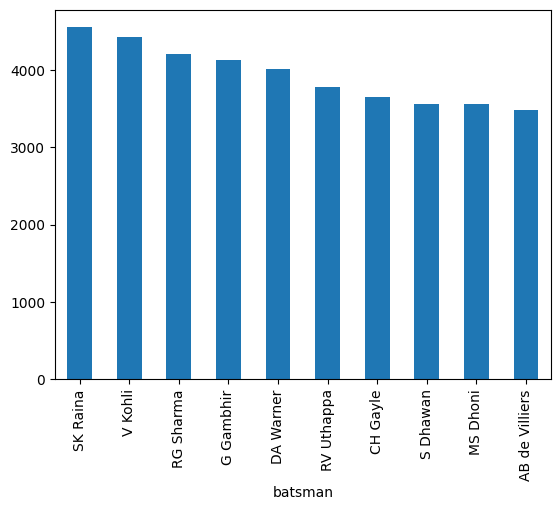

In [35]:
top = deliv.groupby(['batsman'])['batsman_runs'].sum()
top10=top.sort_values(ascending=False)[:10]
top10.plot.bar()

**Top Batsman's with 1's, 2's, 3's, 4's**

In [36]:
hsr[1].sort_values(ascending=False).head().reset_index()

,batsman,1
0,V Kohli,1410.0
1,RG Sharma,1379.0
2,SK Raina,1377.0
3,G Gambhir,1313.0
4,S Dhawan,1137.0


In [37]:
hsr[2].sort_values(ascending=False).head().reset_index()

,batsman,2
0,MS Dhoni,251.0
1,G Gambhir,245.0
2,SK Raina,242.0
3,V Kohli,242.0
4,DA Warner,207.0


In [38]:
hsr[3].sort_values(ascending=False).head().reset_index()

,batsman,3
0,M Vijay,17.0
1,S Dhawan,16.0
2,G Gambhir,15.0
3,AM Rahane,14.0
4,DA Warner,13.0


In [39]:
hsr[4].sort_values(ascending=False).head().reset_index()

,batsman,4
0,G Gambhir,484.0
1,SK Raina,402.0
2,S Dhawan,401.0
3,DA Warner,401.0
4,V Kohli,384.0


In [40]:
hsr[6].sort_values(ascending=False).head().reset_index()

,batsman,6
0,CH Gayle,266.0
1,SK Raina,174.0
2,RG Sharma,173.0
3,DA Warner,160.0
4,V Kohli,160.0


**Top Individual Scores**

In [41]:
tis = deliv.groupby(["id",'inning', "batsman"])["batsman_runs"].sum().reset_index()
tis.sort_values('batsman_runs', ascending=0).head()


,id,inning,batsman,batsman_runs
6217,411,1,CH Gayle,175
902,60,1,BB McCullum,158
8458,562,1,AB de Villiers,133
9289,620,1,AB de Villiers,129
5596,372,1,CH Gayle,128


**Highest score in each inning**

In [42]:
tisi = deliv.groupby(["id",'inning', "batsman"])["batsman_runs"].sum().reset_index()
tisi.sort_values('batsman_runs', ascending=0).head()
tisi['high_scorer']=""
tisi['high_scorer']=tisi.groupby(['id','inning'])['batsman_runs'].transform(max)
tisi = tisi[tisi['batsman_runs']==tisi['high_scorer']]
tisi

/tmp/ipython-input-42-1844787910.py:4: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  tisi['high_scorer']=tisi.groupby(['id','inning'])['batsman_runs'].transform(max)


,id,inning,batsman,batsman_runs,high_scorer
5,1,1,Yuvraj Singh,62,62
7,1,2,CH Gayle,32,32
19,2,1,JC Buttler,38,38
30,2,2,SPD Smith,84,84
35,3,1,SK Raina,68,68
...,...,...,...,...,...
9506,634,2,MK Pandey,36,36
9512,635,1,AJ Finch,50,50
9523,635,2,DA Warner,93,93
9532,636,1,DA Warner,69,69


**Individual Scores By Top Batsman each Inning**

In [43]:
btsmn=['CH Gayle','V Kohli','G Gambhir','SK Raina','YK Pathan','MS Dhoni','AB de Villiers','DA Warner']
scores = deliv.groupby(["id", "batsman","batting_team"])["batsman_runs"].sum().reset_index()
scores=scores[tis['batsman'].isin(btsmn)]
scores

/tmp/ipython-input-43-4086563198.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  scores=scores[tis['batsman'].isin(btsmn)]


,id,batsman,batting_team,batsman_runs
1,1,BCJ Cutting,Sunrisers Hyderabad,16
7,1,Mandeep Singh,Royal Challengers Bangalore,24
29,2,SPD Smith,Rising Pune Supergiant,84
35,3,JJ Roy,Gujarat Lions,14
37,3,SK Raina,Gujarat Lions,68
...,...,...,...,...
9487,635,DR Smith,Gujarat Lions,1
9493,635,RA Jadeja,Gujarat Lions,19
9497,636,AB de Villiers,Royal Challengers Bangalore,5
9504,636,DJ Hooda,Sunrisers Hyderabad,3


### **Top Bowlers**

**Highest Wicket Taker**

<Axes: xlabel='bowler'>

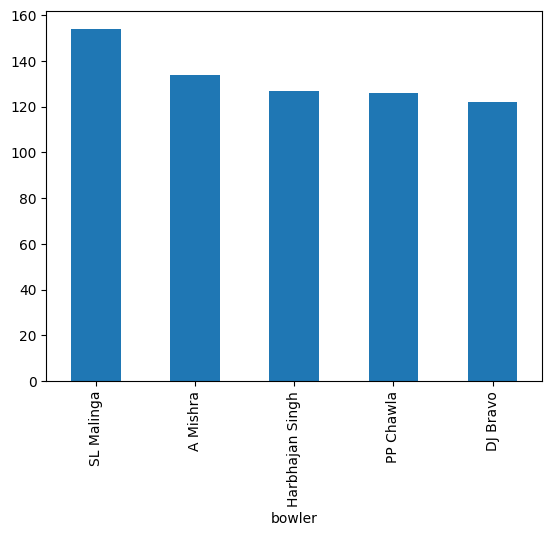

In [44]:
outs = ["bowled", "stumped", "caught", "lbw", "caught and bowled","hit wicket"]
hwt=deliv[deliv["dismissal_kind"].isin(outs)]
hwtaker=hwt['bowler'].value_counts()
hwtaker.head().plot.bar()

**Maximum Overs**

In [50]:
ball_counts = deliv[deliv['wide_runs'] == 0][deliv['noball_runs'] == 0]
ball_counts = ball_counts['bowler'].value_counts()

overs_bowled = (ball_counts // 6).sort_values(ascending=False)

top5_bowlers = overs_bowled.head(5).reset_index()
top5_bowlers.columns = ['bowler', 'overs_bowled']

top5_bowlers


/tmp/ipython-input-50-42210751.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ball_counts = deliv[deliv['wide_runs'] == 0][deliv['noball_runs'] == 0]


,bowler,overs_bowled
0,Harbhajan Singh,486
1,A Mishra,439
2,PP Chawla,427
3,SL Malinga,426
4,P Kumar,420


**Most Economical Bowlers with 300+ overs**

In [49]:
maxo['economy'] = maxo['total_runs'] / maxo['overs_count']

maxe = maxo[maxo['overs_count'] > 300]

top5_economy = maxe.sort_values('economy').head()

top5_economy = top5_economy[['economy', 'overs_count', 'total_runs']].reset_index()

top5_economy


NameError: name 'maxo' is not defined

**Highest Dismissals for a Batsman by a Bowler**

In [51]:
hd = hwt[['batsman','bowler']]
hd = hd.groupby(['batsman','bowler']).size().reset_index().rename(columns={0:'count'})
hdbb = hd.sort_values(by='count',ascending = False)
hdbb = hdbb.drop_duplicates('batsman').reset_index()
hdbb

,index,batsman,bowler,count
0,3147,MS Dhoni,Z Khan,7
1,3887,RG Sharma,R Vinay Kumar,6
2,403,AM Rahane,B Kumar,6
3,5049,V Kohli,A Nehra,6
4,1553,G Gambhir,Z Khan,6
...,...,...,...,...
415,2005,JO Holder,Mustafizur Rahman,1
416,2002,JM Kemp,PP Ojha,1
417,2000,JJ van der Wath,PP Chawla,1
418,1998,JJ Roy,PP Chawla,1


# Dream11

In [52]:
squad = []
mtd11 = mat[['id','season']]
mtd11 = mtd11.loc[mtd11['season']>=2015]
deld11 = deliv[['id','batsman','batsman_runs','bowler','dismissal_kind','fielder']]
mdd11 = pd.merge(mtd11,deld11,on='id',how='inner')
stumps = mdd11.groupby('fielder')['dismissal_kind'].agg(lambda x: (x=='stumped').sum()).reset_index()
stumps = stumps.sort_values(by='dismissal_kind',ascending=False).head().reset_index()
stumps = stumps.head()
wk = stumps['fielder'].unique()
wk = wk.tolist()

In [53]:
scrs = mdd11.groupby(["batsman"])["batsman_runs"].sum().reset_index()
scrs = scrs.sort_values(by='batsman_runs',ascending=False)
wt = scrs[scrs['batsman'].isin(wk)]
wkt = wt.iloc[0]['batsman']
bkpwkt = wt.iloc[1]['batsman']
scrs = scrs[scrs.batsman!=wkt]
scrs = scrs[scrs.batsman!=bkpwkt]
WicketKeeper = wt[:1]['batsman'].tolist()
bkpWicketKeeper = wt[1:2]['batsman'].tolist()
WicketKeeper,bkpWicketKeeper

(['RV Uthappa'], ['MS Dhoni'])

In [54]:
fielders = mdd11.groupby('fielder')['dismissal_kind'].agg(lambda x: (x=='caught').sum()).reset_index()
fielders = fielders.sort_values(by='dismissal_kind',ascending=False).reset_index()
best_fielders = fielders.head(100)
bf = best_fielders['fielder'].unique()
bf = bf.tolist()

In [55]:
btsms = scrs[scrs['batsman'].isin(bf)]
Batsmans = btsms[:4]['batsman'].tolist()
bkpBatsmans = btsms[4:6]['batsman'].tolist()
Batsmans,bkpBatsmans

(['DA Warner', 'V Kohli', 'AB de Villiers', 'AM Rahane'],
 ['S Dhawan', 'G Gambhir'])

In [57]:
saa=mdd11[mdd11["dismissal_kind"].isin(outs)]
blwr=saa['bowler'].value_counts().reset_index()
btsms = scrs[scrs['batsman'].isin(bf)]
blwr.columns = ['bowler', 'wickets']
wktsmean = blwr['wickets'].mean()
scrmean = btsms['batsman_runs'].mean()

In [60]:
blwr.columns = ['bowler', 'wickets']
allrr = blwr.loc[blwr['wickets'] > 18]
allrr = allrr[6:]
allr1 = allrr['bowler'].unique().tolist()
alr = allr[allr['batsman'].isin(allr1)]
Allrounders = alr[:2]['batsman'].tolist()
bkpAllrounders = alr[2:]['batsman'].tolist()

Allrounders, bkpAllrounders


(['MC Henriques', 'SR Watson'], ['AD Russell'])

In [84]:
Bowlers = blwr[:4]['bowler'].tolist()
bkpBowlers = blwr[4:6]['bowler'].tolist()
Bowlers,bkpBowlers

(['B Kumar', 'YS Chahal', 'MJ McClenaghan', 'Sandeep Sharma'],
 ['DJ Bravo', 'AR Patel'])

In [85]:
Team11 = WicketKeeper + Batsmans +Allrounders + Bowlers
BackupPlayers = bkpWicketKeeper + bkpBatsmans + bkpAllrounders + bkpBowlers
Squad = Team11 + BackupPlayers

In [86]:
Team11

['RV Uthappa',
 'DA Warner',
 'V Kohli',
 'AB de Villiers',
 'AM Rahane',
 'MC Henriques',
 'SR Watson',
 'B Kumar',
 'YS Chahal',
 'MJ McClenaghan',
 'Sandeep Sharma']

In [87]:
Squad

['RV Uthappa',
 'DA Warner',
 'V Kohli',
 'AB de Villiers',
 'AM Rahane',
 'MC Henriques',
 'SR Watson',
 'B Kumar',
 'YS Chahal',
 'MJ McClenaghan',
 'Sandeep Sharma',
 'MS Dhoni',
 'S Dhawan',
 'G Gambhir',
 'AD Russell',
 'DJ Bravo',
 'AR Patel']

In [88]:
BackupPlayers

['MS Dhoni', 'S Dhawan', 'G Gambhir', 'AD Russell', 'DJ Bravo', 'AR Patel']

**Algorithms and their Accuracy**

In [62]:
mat.replace(['Mumbai Indians','Kolkata Knight Riders','Royal Challengers Bangalore','Deccan Chargers','Chennai Super Kings',
                 'Rajasthan Royals','Delhi Daredevils','Gujarat Lions','Kings XI Punjab',
                 'Sunrisers Hyderabad','Rising Pune Supergiant','Kochi Tuskers Kerala','Pune Warriors']
                ,['MI','KKR','RCB','DC','CSK','RR','DD','GL','KXIP','SRH','RPS','KTK','PW'],inplace=True)
encode = {'team1': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'team2': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'toss_winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13},
          'winner': {'MI':1,'KKR':2,'RCB':3,'DC':4,'CSK':5,'RR':6,'DD':7,'GL':8,'KXIP':9,'SRH':10,'RPS':11,'KTK':12,'PW':13,'Draw':14}}
mat.replace(encode, inplace=True)
mat.head(2)

/tmp/ipython-input-62-4091889437.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  mat.replace(encode, inplace=True)


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,10,3,3,field,normal,0,10,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,1,11,11,field,normal,0,11,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi


In [63]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['city','toss_decision','venue']
le = LabelEncoder()
for i in var_mod:
    mat[i] = le.fit_transform(mat[i])
mat.dtypes

,0
id,int64
season,int64
city,int64
date,object
team1,int64
team2,int64
toss_winner,int64
toss_decision,int64
result,object
dl_applied,int64


In [64]:
x=mat.drop(['id','season','date','result','dl_applied','winner','player_of_match','umpire1','umpire2'],axis=1)
y=mat['winner']

In [65]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train,x_test,y_train,y_test)

     city  team1  team2  toss_winner  toss_decision  win_by_runs  \
546     7      5      2            2              1            2   
0      13     10      3            3              1           35   
404    13      9     10            9              0            0   
71     21      1      4            4              1            0   
263    21     13      5           13              0            0   
..    ...    ...    ...          ...            ...          ...   
9      21     10      1            1              1            0   
359    21      1      3            3              1            0   
192     6      6      9            9              1           31   
629    17      1      8            8              1            0   
559    20      9      2            9              0            0   

     win_by_wickets  venue  
546               0     15  
0                 0     23  
404               5     23  
71               10      4  
263               8      4  
..       

**Random Forest**

In [66]:
random_forest=RandomForestClassifier(n_estimators=17,max_depth=5)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=17)

In [67]:
y_pred=random_forest.predict(x_test)
y_pred_train=random_forest.predict(x_train)

In [68]:
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.5706806282722513


**KNN Classifier**

In [69]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [70]:
y_pred=knn.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.31413612565445026


In [71]:
y_pred=knn.predict(x_train)
acc_score=metrics.accuracy_score(y_train,y_pred) #gives the accuracy of the model
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.44719101123595506


**Decision Tree**

In [72]:
dtree=DecisionTreeClassifier(criterion='entropy',max_depth=16)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=16)

In [73]:
y_pred=dtree.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.9424083769633508


In [74]:
y_pred=dtree.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 1.0


**Logistic Regression**

In [75]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
y_pred=logreg.predict(x_test)
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.3089005235602094


In [77]:
y_pred=logreg.predict(x_train)
acc_score = metrics.accuracy_score(y_train,y_pred)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.34606741573033706


**SVM**

In [80]:
svm=SVC(kernel='linear')
svm.fit(x_train,y_train)
y_pred=svm.predict(x_test)
y_pred_train=svm.predict(x_train) #y_pred is prediction of test data
acc_score=metrics.accuracy_score(y_test,y_pred) #gives the accuracy of the model
print("Accuracy of Test:", acc_score)

Accuracy of Test: 0.3089005235602094


In [81]:
acc_score = metrics.accuracy_score(y_train,y_pred_train)
print("Accuracy of Train:", acc_score)

Accuracy of Train: 0.44269662921348313


In [82]:
x.head(52).tail(1)

,city,team1,team2,toss_winner,toss_decision,win_by_runs,win_by_wickets,venue
51,17,8,10,10,1,0,8,9


## **Winner Prediction**

In [83]:
dictVal = encode['winner']

input=['8','10','10','1','0','10','0','8']
input = np.array(input).reshape((1, -1))
output=dtree.predict(input)
print(list(dictVal.keys())[list(dictVal.values()).index(output)])

RPS


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
